In [ ]:
#1

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision import datasets

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [14]:
data_path = '../data-unversioned/p1ch7/'
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [28]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616)),
        transforms.RandomCrop(20)
    ]))

In [31]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616)),
        transforms.RandomCrop(20)
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


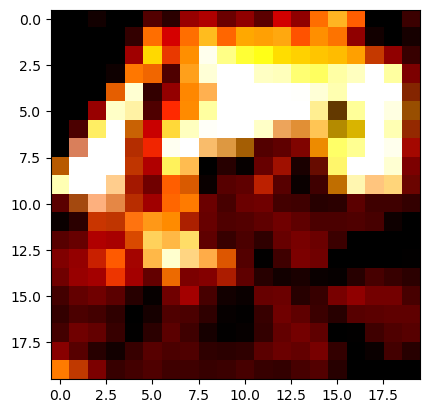

In [29]:
img, label = cifar10[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [32]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [37]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=2000,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(1200, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss_val = loss_fn(outputs, labels)
    
    print("Epoch: %d, Loss_train: %f, Loss_val: %f" % (epoch, float(loss), loss_val))

Epoch: 0, Loss_train: 0.336497, Loss_val: 0.496394
Epoch: 1, Loss_train: 0.661978, Loss_val: 0.477465
Epoch: 2, Loss_train: 0.612689, Loss_val: 0.357146
Epoch: 3, Loss_train: 0.427981, Loss_val: 0.322598
Epoch: 4, Loss_train: 0.457118, Loss_val: 0.609582
Epoch: 5, Loss_train: 0.581130, Loss_val: 0.401691
Epoch: 6, Loss_train: 0.251331, Loss_val: 0.582144
Epoch: 7, Loss_train: 0.399178, Loss_val: 0.671516
Epoch: 8, Loss_train: 0.315693, Loss_val: 0.473415
Epoch: 9, Loss_train: 0.427933, Loss_val: 0.692949
Epoch: 10, Loss_train: 0.750673, Loss_val: 0.489494
Epoch: 11, Loss_train: 0.320343, Loss_val: 0.406288
Epoch: 12, Loss_train: 0.191889, Loss_val: 0.369098
Epoch: 13, Loss_train: 0.553347, Loss_val: 0.556523
Epoch: 14, Loss_train: 0.517884, Loss_val: 0.569440
Epoch: 15, Loss_train: 0.304829, Loss_val: 0.723987
Epoch: 16, Loss_train: 0.546278, Loss_val: 0.296880
Epoch: 17, Loss_train: 0.412203, Loss_val: 0.635300
Epoch: 18, Loss_train: 0.609473, Loss_val: 0.419686
Epoch: 19, Loss_train:

In [38]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.986700


In [39]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.776000
